<a href="https://colab.research.google.com/github/YugPatel07/Machine-Learning/blob/main/WineQualityPred_YUGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [ ]:
data = pd.read_csv('/content/WIneQuality.csv')
data.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [ ]:
data.shape

(4894, 10)

In [ ]:
data.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

array([[<Axes: title={'center': 'Quality_Category'}>,
        <Axes: title={'center': 'volatileacidity'}>,
        <Axes: title={'center': 'citricacid'}>],
       [<Axes: title={'center': 'residualsugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'freesulfurdioxide'}>],
       [<Axes: title={'center': 'totalsulfurdioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'sulphates'}>],
       [<Axes: title={'center': 'alcohol'}>, <Axes: >, <Axes: >]],
      dtype=object)

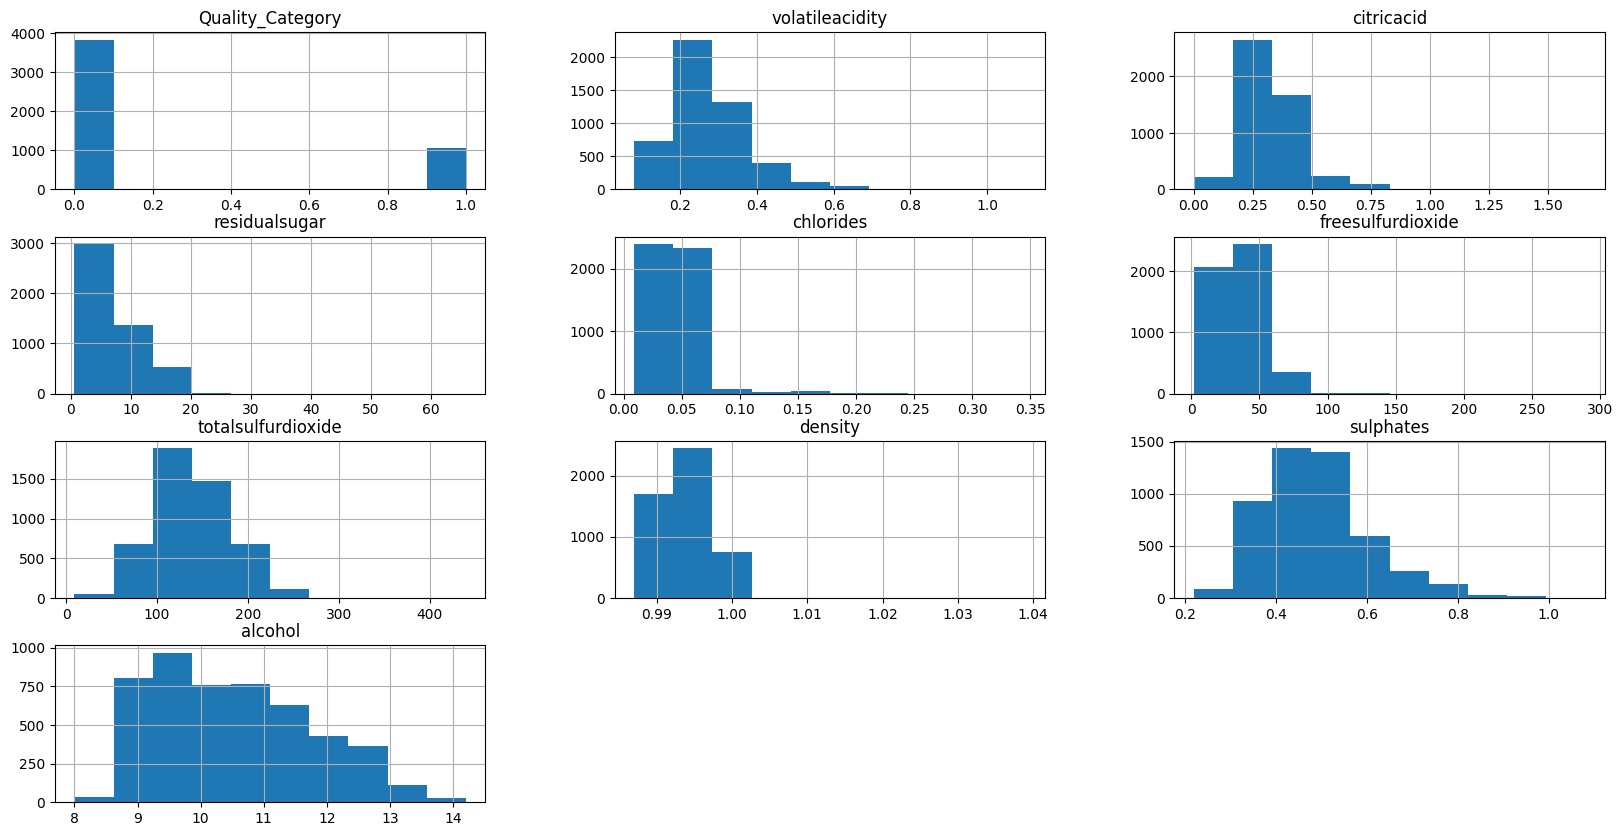

In [ ]:
data.hist(figsize=(20,10))

<Axes: >

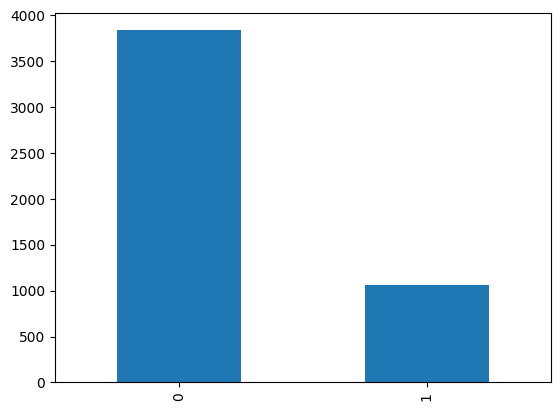

In [ ]:
data['Quality_Category'].value_counts().plot(kind= 'bar')

In [ ]:
x = data.drop('Quality_Category',axis=1)
y = data.Quality_Category

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state= 0)

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
pred = clf.predict(x_test)

In [ ]:
print('Training Score:- ', clf.score(x_train, y_train))
print('Testing Score:- ', clf.score(x_test, y_test))

Training Score:-  0.7787994891443167
Testing Score:-  0.8028600612870276


In [ ]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
print('Accuracy Score:- ', accuracy_score(y_test, pred))
print('R2 Score:- ', r2_score(y_test, pred))
print('Confusion Matrix :- \n', confusion_matrix(y_test, pred))

Accuracy Score:-  0.8028600612870276
R2 Score:-  -0.24554707379134855
Confusion Matrix :- 
 [[786   0]
 [193   0]]


In [ ]:
from sklearn.model_selection import cross_val_score
param = cross_val_score(estimator= clf, X= x_train, y= y_train, cv= 10)
print('Accuracies:- {:.2f} %'.format(param.mean()*100))
print('Standard Deviation:- {:.2f} %'.format(param.std()*100))

Accuracies:- 77.88 %
Standard Deviation:- 0.10 %


### From the result we can tell, model is average fit & can be improved. So now we'll try all Hyperparameters, using GridSearch method to see how can the model have a best fit.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.5, 1], 'kernel':['linear']}]

GS = GridSearchCV(estimator= clf,
                  param_grid= parameters,
                  scoring='accuracy',
                  cv=3, n_jobs= -1)
GS.fit(x_train, y_train)
best_accuracy = GS.best_score_
best_parameters = GS.best_params_

print('Best Accuracy:- {:.2f} %'.format(best_accuracy*100))
print('Best Parameters: ', best_parameters)

Best Accuracy:- 77.88 %
Best Parameters:  {'C': 0.5, 'kernel': 'linear'}


It took "6 mins" for Grid search to go through, 2 parameter, 3 times.

In [ ]:
#Imagine Time it'll take to go through all parameters! (44 parameters, 5 times)
"""
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25, 0.5, 0.75, 1], 'kernel':['linear']},
              {'C':[0.25, 0.5, 0.75, 1], 'kernel':['rbf', 'poly'], 'gamma':[0.2, 0.4, 0.6, 0.8, 1]}]

GS = GridSearchCV(estimator= clf,
                  param_grid= parameters,
                  scoring='accuracy',
                  cv=5, n_jobs= -1)
GS.fit(x_train, y_train)
best_accuracy = GS.best_score_
best_parameters = GS.best_params_

print('Best Accuracy:- {:.2f} %'.format(best_accuracy*100))
print('Best Parameters: ', best_parameters)
"""